### Iris flower classification using ML 

In [83]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [84]:
# loading dataset
df=pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [85]:
# shape of the dataset 
df.shape

(150, 5)

In [86]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [87]:
# Dataset description 
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [88]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [89]:
target_counts=df["variety"].value_counts()
target_counts

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

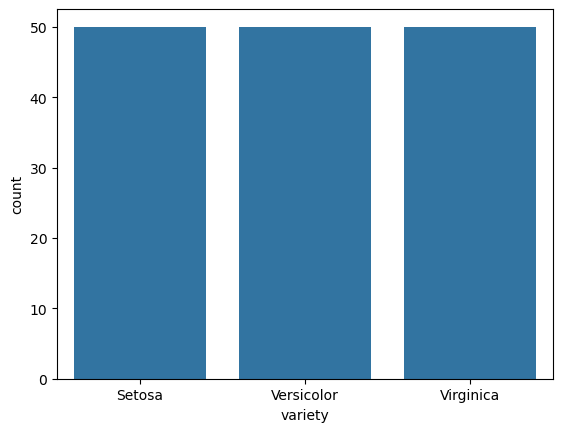

In [90]:
# visualize the dataset 
sns.countplot(x=df["variety"]) 
plt.show()

In [91]:
# checking null values
df.isna()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [92]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

<Axes: >

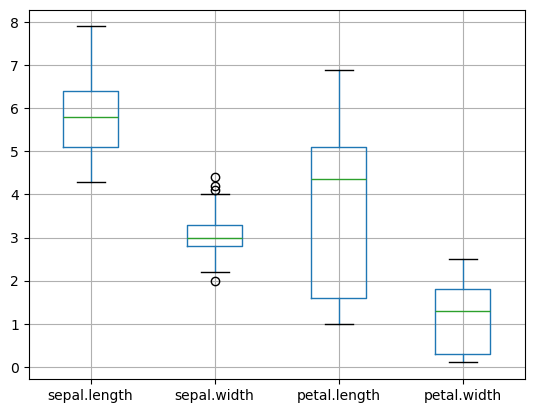

In [93]:
# checking outliers
df.boxplot()

In [94]:
# removing outlier using IQR method

lower_b = df["sepal.width"].quantile(0.25)
upper_b = df["sepal.width"].quantile(0.75)

IQR = upper_b - lower_b

outlier_iqr = df[(df["sepal.width"]< (lower_b - 1.5 * IQR))  | (df["sepal.width"] > (upper_b +1.5 * IQR))]

# removing outliers 

cleaned_df = df[(df['sepal.width'] >= (lower_b - 1.5 * IQR)) & (df['sepal.width'] <= (upper_b + 1.5 * IQR))]

print(cleaned_df)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[146 rows x 5 columns]


<Axes: >

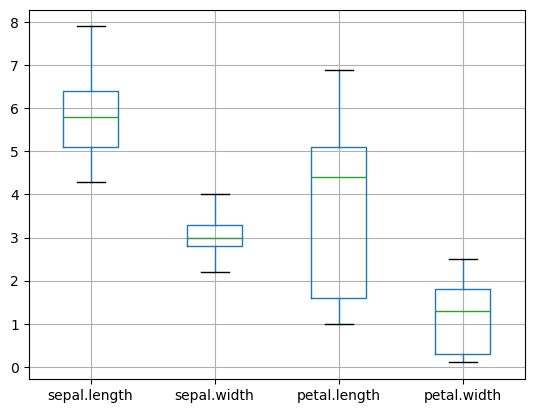

In [95]:
# clear data
cleaned_df.boxplot()

<Figure size 1000x600 with 0 Axes>

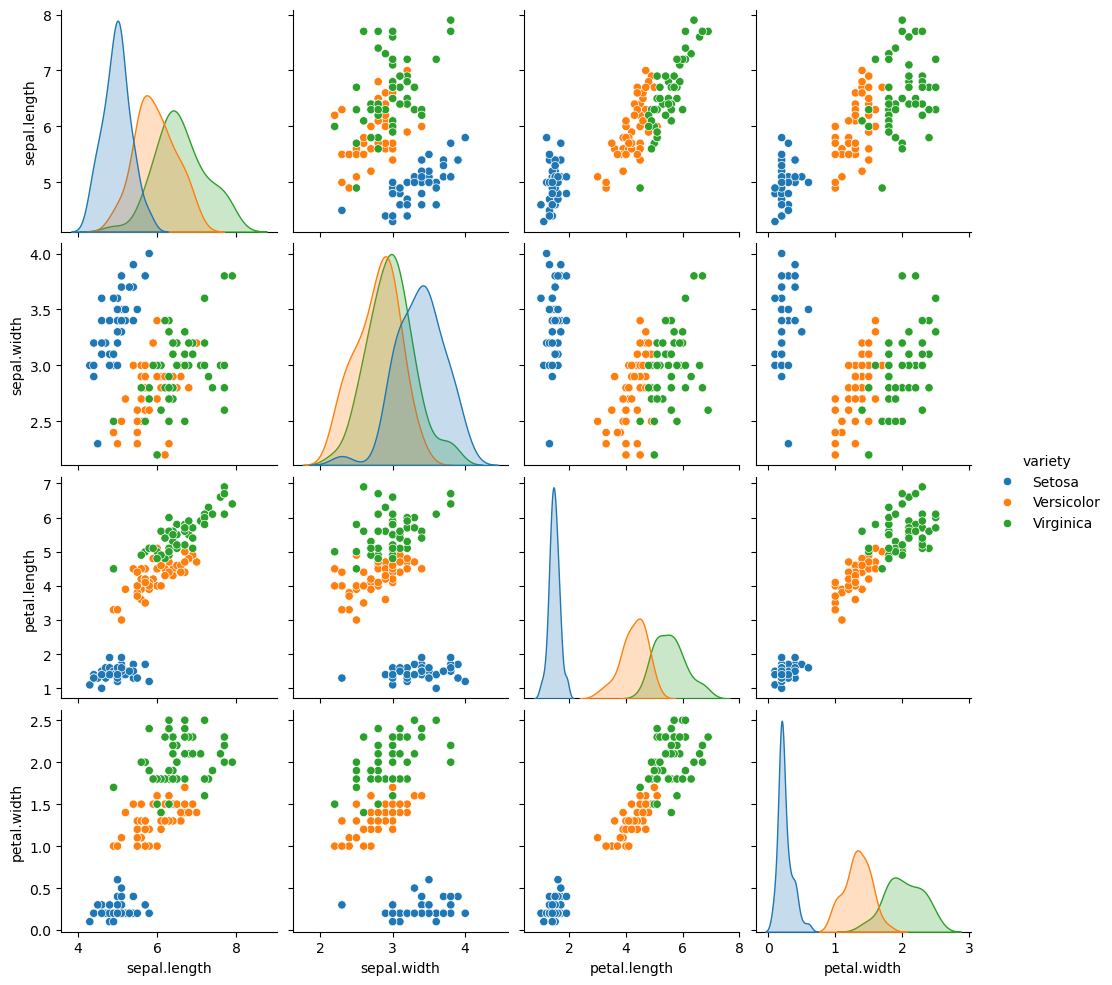

In [96]:
plt.figure(figsize=(10,6))
sns.pairplot(cleaned_df,hue='variety', diag_kind='kde')
plt.show()

In [97]:
X = cleaned_df.drop(columns=["variety"])
y= cleaned_df["variety"]

print("shape of X", X.shape)
print("shape of y", y.shape)

shape of X (146, 4)
shape of y (146,)


In [98]:
# splitting of the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(116, 4) (30, 4) (116,) (30,)


In [99]:
# building models 

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)



In [100]:
# checking accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr_accuracy = accuracy_score(y_pred, y_test)
print(lr_accuracy)

0.9333333333333333


In [101]:
# classification report 
lr_classification_report = classification_report(y_test, y_pred)
print(lr_classification_report)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       0.88      0.88      0.88         8
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [102]:
# confusion_matrix

lr_confusion_matrix = confusion_matrix(y_pred, y_test)
print(lr_confusion_matrix)

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


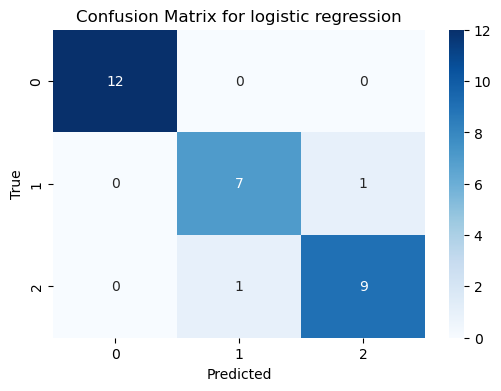

In [103]:
plt.figure(figsize=(6, 4))
sns.heatmap(lr_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for logistic regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()